# An introduction to modelling optical fibre links

<div class="alert alert-block alert-info"> 
The aim of this experiment is to develop a computer model of an optical fibre communications link that includes the effects of attenuation, dispersion and noise. Your model should be able to simulate eye-diagrams and you should use these to assess link performance. 
<b>Key result: </b> 
for suggested typical system parameters determine whether 1 Gb/s and 10 Gb/s links are limited by attenuation or dispersion, and estimate at what length interval you will need to introduce regenerators for each bitrate.
</div>

When designing optical fibre networks it is often convenient to model or simulate the propagation of optical pulses through the complete fibre link to determine the effect of attenuation and dispersion in the fibre and noise in the detector. All three factors effect on the reception of pulses sent down the fibre; attenuation reduces the power of the pulse to a point where it can be lost in the noise and dispersion causes the pulse to broaden so that the signal from neighbouring pulses overlaps. In high data rate optical networks these effects limit the distance that the pulses can propagate over for a given data rate. This exercise is designed to encourage you to investigate these effects, and to study their impact on optical fibre links by writing a simple computer program to model pulse propagation.

You can use any method you wish to write programs to produce the results.  But you are encouraged to build on the results of your modelling optical fibres demonstration experiment byusing python.  This script is written as a set of assignments, the earlier ones in particular are to help structure your work and help you develop your models, which in the later ones you are expected to produce results. However, do not take this script as a template for your report, which should concentrate instead on the more advanced elements of your study such as actually working out what links would work in practice in assignment 4. And do try to get on to the extension exercises at the end of the script, once you have a working model they should be easy to implement.

## Assignment 1 - Dispersion

<div class="alert alert-block alert-info"> 
This assignment is something that you should be able to complete relatively easily based on your demonstration experiment.  It is meant as a gentle introduction to get you going and will not provide results that you should include in your report.
</div>

Write a program to model the propagation of Gaussian shaped pulses through a fibre link. Assume that your source emits pulses with shape given by:

$$P(t) = P_{0}\exp{\left(\frac{-t^{2}}{2 \tau_{0}^{2}}\right)}$$

where $P_0$ is the *peak* input power, $t$ is time, and $\tau_0$ is the width of the Gaussian pulse. Note that it is usually this peak power that is limited in fibre communications due to non-linear effects in the fibre. 

Take into account the pulse spreading in the optical fibre by using the formula

$$\Delta\tau = D \times \Delta\lambda \times L$$

where $D$ is a dispersion coefficient in units of \[ns / (km.nm)\], $L$ is the length of the fibre, and $\Delta\lambda$ is the optical linewidth. $\Delta\tau$ is then the dispersion induced pulse broadening such that the total pulse width $\tau$ is given by:

$$\tau^2 = \tau_0^2 + \Delta\tau^2$$

remembering that as the pulse gets wider its height must reduce to maintain the same **pulse energy**. 

Plot the pulse shape for D = 15ps/nm/km, Δλ= 0.1 nm, τ0 = 0.5 ns and for L = 10km, 50km and 100km.

<div class="alert alert-block alert-success"> Add your own input here. </div>

Next plot, for the three lengths, a train of pulses initially of width 0.5ns separated (peak to peak) by a time interval of 2 ns. Compare the output of the detector when the pulses propagate through the fibre with the following set of parameters.
1. A train of 10 pulses initially of width 0.5 ns separated by intervals of 2 ns.
2. A train of 10 pulses initially of width 0.5 ns separated by intervals of 1 ns.
3. A random sequence of pulses (eg 110010101000110) initially of width 0.5ns separated by intervals of 2 ns.

<div class="alert alert-block alert-success"> Add your own input here. </div>

## Assignment 2 – Eye diagrams
You will have noticed in the previous assignment that when pulsed broaden then they start to overlap and if can become difficult to identify the individual pulses.  However, in a digital system it is not so important to be able to split neughbouring pulses, but it is important to be able to differentiate between a received 0 and a received 1. In other words can you tell whether a pulse is present or missing whilst surrounded by other pulses that may themselves be present or missing. In the previous section you may have noticed that at some points it is difficult to be able to discern individual pulses that are next to each other, but actually it is still possible to see the difference between a pulse and no pulse. In practice a communications channel would be evaluated by considering the sort of random sequence of pulses as described in and then overlaying many received such random signals aligned at a pulse centres to produce an *eye diagram*. The ability of the receiver to discern the difference between a 0 and a 1 is thus revealed in the “openness” of the eye at the aligned pulse centres.

| ![Image](eye.png) |
|:-:|
| **Figure 1: Measured Eye diagram from an optical fibre system** |



To simulate eye diagrams, write a python function that will calculate the signal for a given sequence of bits.  Then overlay plots for different bit sequences to generate your full eye diagram. Use your eye diagrams to think about what might be a sensible Gaussian pulse width to use for a given bit-rate.  Note that using too narrow a pulse width might not be the best thing as its total *energy* will be reduced so your signal-to-noise might be compromised at the detector.  Use too wide a pulse width and your eye will close in from the sides.

<div class="alert alert-block alert-success"> Add your own input here. </div>

## Assignment 3 - Adding noise

The optical detection process is subject to random noise associated with several different physical processes. This can lead to errors in interpretation of data. For example, a binary “0” can be mis-interpreted as a “1”, or a "1" as a "0". Most links are tested to evaluate their sensitivity to noise and a bit error rate (BER) is specified. Typical values of error rates are 1 in $10^9$ or even 1 in $10^{12}$.

Consider and discuss how you can extend the simulations carried out in assignment 1 and 2 to include the effects of random noise. Remember in particular that the bandwidth of the receiver electronics is usually low pass filtered to reduce the noise to as little as possible.  For a received signal at a bit rate $B$ the cut-off for this low pass filter should be at $f_c=B/2$. 

There are 2 main types of noise in the system that you should consider:

1. The fundamental limit to noise generation in an optical detector is set by the noise generated by quantum processes – your detector will detect individual photons in the optical signal by converting them to individual photo-electrons and, in the simplest case, these will tend to arrive at random times. This is known as shot noise. Shot noise is a *Poissonian* process governed by *Poisson* statistics - if you expect to receive $N$ photons then the actual number that you receive will have a standard deviation $\sigma=\sqrt{N}$. So you would actually expect the brighter parts of your signal (the ones) to have a higher noise than the dimmer parts (the zeros).

2. Thermal noise in the receiver electronics is usually the limiting factor in an optical communications system and for a given receiver this is characterized by the Noise Equivalent Power (NEP) - the received optical power that would present the same signal level at the detector as that due to the inherent RMS noise in the receiver. To complicate this further, some receivers might simply quote a value for NEP in units of power (W) for a fixed detector bandwidth, and others might use units of power per square root of bandwidth (W/√Hz) to take account of the typical variation in noise as the bandwidth (B) of the receiver is changed. To make your programme more flexible we will use the latter and take account of the bandwidth that you require to receive your signal 

### Simulating a receiver with a limited bandwidth

In order to simulat our communications system we need to simulate a receiver with a reduced bandwidth of $f_c=B/2$.  Fortunately the `scipy` module has a signal processing package `scipy.signal` that can help us do this.  We are going to simulate our system in terms of the number of received photons so that we can simulate the effect of shot noise, and an equivalent receiver noise.  The simulation works by:

* split time into a series of small bins, much faster than our bit-rate (say $tbin\approx 10ps$).  
* calculate how many photons we expect to receive in each $tbin$
* calculate an actual number of received photons based on poisson statistics
* calculate an equivalent random number of photoncs based on the receiver NEP.
* low pass filter the result at $f_c=B/2$  

To start with lets simulate a square pulse an apply a low pass filter using scipy (the final step above).  For more details on what a digital filter is see Appendix or read the `scipy.signal` documentation.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import signal

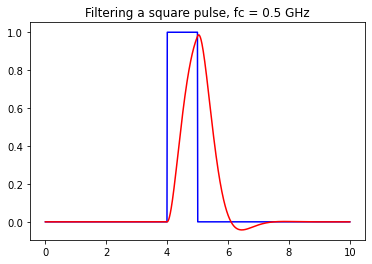

In [17]:
n = 1000
tbin = 10 / n                   # The width of time bins (in nsec)
t = np.linspace(0, 10, n)       # A set of time points
tstep = tbin
fs = 1 / tstep                  # The sampling frequency
sig = 1.0 * (t>4) * (t<5)       # Generate a square pulse of amplitude 1
plt.figure()
plt.plot(t, sig, 'b')           # Plot the input signal
fc = 0.5                        # The cutoff frequency of the filter (in GHz)
# Generate filter coefficients
sos = scipy.signal.butter(2, fc, fs=fs, output='sos')
# Filter the data
sigfilt = scipy.signal.sosfilt(sos, sig)     
plt.plot(t, sigfilt, 'r')       
plt.title(f'Filtering a square pulse, fc = {fc} GHz')
plt.draw()

What this code does is it generates an array of signal points (plotted as the blue line).  It then creates the coefficients for a digital *Butterworth* filter using the function `scipy.signal.butter()` and applies that to our signal array using the function `scipy.signal.sosfilt()`.  The output is plotted as the red line.  

If we want to simulate a real photon stream then we need to convert our received signal power in each time bin to a number of photons.  We do this by calculating the energy in each time bin and then divide by the photon energy: 

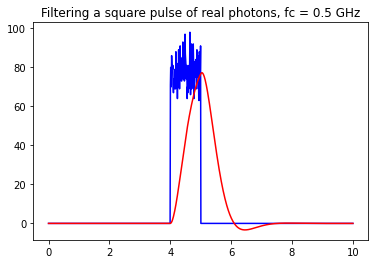

In [19]:
signal_power = 1e6                  # units in pW
wavelength = 1.55e-6                # units in µm
Uphoton = scipy.constants.h * scipy.constants.c / wavelength * 1.0e12  # photon energy in units pJ
# Scale our square pulse to units of photons
sig_photon_e = signal_power * tstep * 1e-9 / Uphoton * sig      
plt.figure()
rng = np.random.default_rng()       # Get the default random number generator
sig_photon = rng.poisson(sig_photon_e)   # Generate a photon signal with poisson statistics
plt.plot(t, sig_photon, 'b')        # Plot the input signal
sig_photon_filt = scipy.signal.sosfilt(sos, sig_photon)     # Filter the data
plt.plot(t, sig_photon_filt, 'r')   # Plot the filtered photon signal
plt.title(f'Filtering a square pulse of real photons, fc = {fc} GHz')
plt.draw()

Actually 1 $\mu$W is a relatively high power in terms of photon numbers, you might like to try lower powers (eg 1 nW).  This simulation approachwill work with expected number of photons of < 1 per bin yet the filtered output can still look like a reasonable pulse.

To take account of the receiver noise we must calculate the equivalent power in the noise from the $NEP$ multiplied by the square root of the bandwidth.  In this case we need to select a bandwidth $B_s$ consistent with our fast sampling rate of $f_s$ and that bandwidth is $B_s=f_s/2$.  The result is an RMS value (standard deviation) of the variation that we might expect to see at the detector scaled in units of received optical power.  That optical power value is converted into an energy per bin and divided by the photon energy to get a result in number of photons per bin.  We finally need to add a gaussian distributed random number to our detected signal (and shot noise) to give us a final signal in units of photons. Finally we filter the result to give us our band-limited detector signal.

100.0
447213.5954999579
34.89554324021858


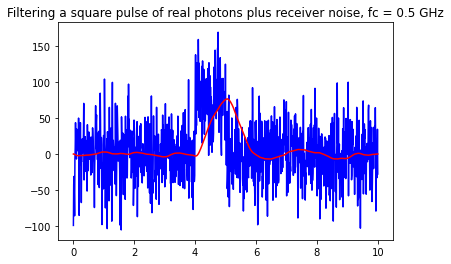

In [22]:
NEP = 2.0                              # Units are pW/sqrt(Hz)
Pnoise = NEP * np.sqrt(fs / 2 * 1.0e9) # calculate noise power (RMS) in pW for sampling frequency fs
print(fs)
print(Pnoise)
# Convert to units of photons to be consistent with the signal
Nnoise_rms = Pnoise * tstep * 1e-9 / Uphoton
print(Nnoise_rms)
# calculate an array of gaussian distributed random numbers with zero mean and the required RMS value
Nnoise = rng.normal(loc=0, scale=Nnoise_rms, size=n)    
plt.figure()
plt.plot(t, Nnoise + sig_photon, 'b')  # Plot the input signal 
sig_filt = scipy.signal.sosfilt(sos, Nnoise + sig_photon)     # Filter the data
plt.plot(t, sig_filt, 'r')
plt.title(f'Filtering a square pulse of real photons plus receiver noise, fc = {fc} GHz')
plt.draw()

You should now be able to sumulate your eye-diagrams taking account of both shot noise and receiver noise.  The examples above show how to apply noise to a simple square pulse, you need to take the same approach but apply the noise and filter to a signal made up of a sequence of gaussian shaped pulses.  Overlay many traces on a single set of axes and you should be able to produce figures like the one below (appropriately labelled of course).

| ![Image](filtered_eyes.png) |
|:-:|
| **Figure 2: 5-bit eye diagrams. Top: expected detector signal; Middle: simulated noisy signal at high sample rate; Bottom: filtered version of the sampled signal.** |

Check that your simulations work as expected.  Do your output graphs look the same even as you change the number of sample bins (and hence $f_s$)?  Note the delay that the filter introduces.  This is a real effect, the output cannot change until it has seen its input change.  In any case this delay is insignificant compared to the time for your pulse to propagate down the fibre.  Remember that you will need to change the pulse width and bandwidth of filter to appropriate values for each bit rate that you simulate.  Try to define these variables in terms of the bit rate in your code so that you only need to change one parameter in your simulation when switching bitrates. 

<div class="alert alert-block alert-success"> Add your own input here. </div>

## Assignment 4 - simulating your whole system

Simulate the operation of a typical optical communications system using your code.  You should try to demonstrate its use for a range of scenarios that demonstrate systems that are limited by both loss and by dispersion, taking into account both receiver and shot noise.  For example consider the following system:

   * A fibre with loss 0.3 dB/km, Dispersion $D$=-20 ps/nm/km, 
   * A source at $\lambda=$1.55 $\mu$m and bandwidth $\delta\lambda=$0.2 nm with a peak power of 1 mW
   * A detector with a NEP=2 pW/√Hz and bandwidth limited appropriately for the signal transmitted
   * Note: be very careful about units in your code!

For operation at (a) $B=$1 Gb/sec and (b) $B=$10 Gb/sec, try to determine whether the fibre link is loss or dispersion limited using your simulations and find out what that limiting propagation distance is for each case.  You should be able to judge by from the eye diagrams when transmission becomes problematic, but try to make an estimate of the likely error in your estimation of limiting length.  With the full model including noise you might also be able to optimise your transmitted pulse width to give best performance.  These results should be the main results that you present in your report.

<div class="alert alert-block alert-success"> Add your own input here. </div>

## Extensions - if you have time

1. Try to determine what you would need to do to the fibre dispersion and/or detector NEP to get your system to operate reliably at 10gB/sec over a 150km length link.  
2. It is obviously best to use a very narrow linewidth source for your communications system, but you can still run into problems as there is a lower limit on the optical linewidth of the modulated signal as determined by the Fourier transform relationship between the pulse width (in time) and the optical linewidth (in optical frequency).  Determine this  fundamental lower limit to the optical linewidth that you need to use in the formula for $\Delta\tau$.  What difference would this make to your answer in 1 above?
3. Up until now you have simulated a 2-level system where the expected value at the receiver should have one of 2 levels and can thus convey 1 bit/symbol.  Consider now a 4-level system (how many bits per symbol can this convey?) and plot its eye diagram.

## Appendix 1 - Digital filters

A useful way to filter signals in the digital domain (in your a model for instance) is to use what is known as an Infinite Impulse Response (IIR) filter.  These are very easy to implement and mimic real world filters and electronics well. In the simplest case to mimic a low pass resistor/capacitor (RC) filter, starting with a sampled signal $x(i)$ at time points $t(i)$ then to calculate the filtered signal $y(i)$ you compute:

$$y(i)=(1-\alpha)y(i-1)+\alpha x(i)$$

As you can see the filter computation is recursive in that you need to compute $y(i-1)$ before you can compute $y(i)$.  In this case the filter mimics an RC filter with a time constant of $-t_s/\ln(1-\alpha)$ where $t_s$ is the time between samples, this filter would have a cutoff frequency of 

$$f_c=\frac{-\ln(1-α)}{2\pi t_s}$$

Actually the Python `scipy.signal` module has functions to build and apply IIR filters to sampled signals, and in general this can compute much more complex IIR filters of the general form:

$$a_1 y(i)=\sum_{j=2}^{n_a}{a_j y(i-j+1)}+\sum_{j=1}^{n_b}{b_j x(i-j+1)}$$

The calculation of the required a and b coefficients can be quite complex but there are built in functions that will work them out for you for simple cases.  We will use the `scipy.signal.butter()` function to calculate coefficeints for a *Butterworth* filter.  Butterworth filters are a good compromise between ringing artefacts (wobbles on the signal after fast transitions) and stop-band attenuation (how well frequencies above the cut-off are attenuated).  `scipy.signal.butter()` has an `order` parameter that sets the values of $n_a$ and $n_b$.  The simple RC filter described above has order $n=1$, we will use order $n=2$ for our Butterworth filter, though you might like to try higer orders.  In general the higher the order of the filter then the greater the stop-band attenuation but also the greater the ringing artefacts.